# Problem Statement

**Analyzing the given dataset to extract valuable insights and provide actionable recommendations.**

In [1]:
# Import Libraries
import os
import re
import plotly
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['axes.grid'] = True

In [2]:
# Reading dataset

customers = pd.read_excel(r'data\customers.xlsx')
geolocation = pd.read_excel(r'data\geolocation.xlsx')
sellers = pd.read_excel(r'data\sellers.xlsx')
orders = pd.read_excel(r'data\orders.xlsx')
order_items = pd.read_excel(r'data\order_items.xlsx')
order_reviews = pd.read_excel(r'data\order_reviews.xlsx')
payments = pd.read_excel(r'data\payments.xlsx')
products = pd.read_excel(r'data\products.xlsx')

In [3]:
# Brazil state data 

brazil = pd.read_html("https://brazil-help.com/brazilian_states.htm")[2]  # reading state data from html file
new_header = brazil.iloc[1] #grab the first row for the header
brazil = brazil[2:] #take the data less the header row
brazil.columns = new_header #set the header row as the df header
brazil.reset_index(inplace=True)
brazil.drop(["index"],axis = 1,inplace=True)
brazil.drop(labels=list(new_header[4:]),axis = 1,inplace=True) # dropping extra columns
brazil.drop(['Capitol City'],axis=1,inplace=True)
brazil.columns = ['state_abb','state','region']

brazil.head()

state_abb     state     region
0        AC      Acre      North
1        AL   Alagoas  Northeast
2        AP     Amapá      North
3        AM  Amazonas      North
4        BA     Bahia  Northeast

## Customer Dataset Analysis

In [4]:
customers = pd.merge(left=customers,right=brazil,how='left',left_on='customer_state',right_on='state_abb')
customers.drop(['state_abb',"customer_state"],axis=1,inplace=True)
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city      state     region  
0                     14409                 franca  São Paulo  Southeast  
1                      9790  sao bernardo do campo  São Paulo  Southeast  
2                      1151              sao paulo  São Paulo  Southeast  
3                      8775        mogi das cruzes  São Paulo  Southeast  
4                     13056               campinas  São Paulo  Southeast

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   state                     99441 non-null  object
 5   region                    99441 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.3+ MB


In [6]:
print("Percentage of Customers in different regions:")
(customers['region'].value_counts()/99441) * 100

Percentage of Customers in different regions:


Southeast      68.649752
South          14.227532
Northeast       9.446808
Center West     5.814503
North           1.861405
Name: region, dtype: float64

68.65% of customers are from Southeast region. 14.23% are from South region and the remaining are from other regions.

In [7]:
print('Total customers:', len(customers))
print('Unique Customers:',len(customers['customer_unique_id'].unique()))

Total customers: 99441
Unique Customers: 96096


In [8]:
# Different States of Customers
customers['state'].value_counts()

São Paulo              41746
Rio de Janeiro         12852
Minas Gerais           11635
Rio Grande do Sul       5466
Paraná                  5045
Santa Catarina          3637
Bahia                   3380
Distrito Federal        2140
Espírito Santo          2033
Goiás                   2020
Pernambuco              1652
Ceará                   1336
Pará                     975
MatoGrosso               907
Maranhão                 747
MatoGrosso do Sul        715
Paraíba                  536
Piauí                    495
Rio Grande do Norte      485
Alagoas                  413
Sergipe                  350
Tocantins                280
Rondônia                 253
Amazonas                 148
Acre                      81
Amapá                     68
Roraima                   46
Name: state, dtype: int64

In [9]:
# Top 10 cities with most customers
customers['customer_city'].value_counts()[:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

In [10]:
# Top 10 cities with least customers
customers['customer_city'].value_counts()[-10:]

machadinho                1
divino das laranjeiras    1
galia                     1
lagoa de sao francisco    1
uniao da serra            1
bequimao                  1
andarai                   1
vargem grande             1
curvelandia               1
eugenio de castro         1
Name: customer_city, dtype: int64

In [11]:
total_cities = len(customers['customer_city'].unique())
total_states = len(customers['state'].unique())

print(f'The customers are from {total_states} states consisiting total of {total_cities} cities.')

The customers are from 27 states consisiting total of 4119 cities.


## Geolocation Dataset Analysis

In [12]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [13]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
# Rows and columns in the dataframe
geolocation.shape

(1000163, 5)

In [15]:
# renaming columns for ease of analysis
geolocation.rename(columns={"geolocation_zip_code_prefix":"zip_code_prefix","geolocation_lat":"latitude","geolocation_lng":"longitude",
                           "geolocation_city":"city","geolocation_state":"state"},inplace=True)

In [16]:
# Checking Duplicate values
geolocation.duplicated().any()

True

In [17]:
# Deleting duplicated fields
geolocation.drop_duplicates(inplace=True)

In [18]:
geolocation.shape

(738332, 5)

## Sellers Dataset Analysis

In [19]:
sellers = pd.merge(left=sellers,right=brazil,how='left',left_on='seller_state',right_on='state_abb')
sellers.drop(['state_abb','seller_state'],axis=1,inplace=True)
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city           state     region  
0           campinas       São Paulo  Southeast  
1         mogi guacu       São Paulo  Southeast  
2     rio de janeiro  Rio de Janeiro  Southeast  
3          sao paulo       São Paulo  Southeast  
4  braganca paulista       São Paulo  Southeast

In [20]:
print('Total Sellers:', sellers.shape[0])

Total Sellers: 3095


In [21]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   state                   3095 non-null   object
 4   region                  3095 non-null   object
dtypes: int64(1), object(4)
memory usage: 145.1+ KB


In [22]:
print("percentage of sellers in different regions")
(sellers['region'].value_counts()/3095) * 100

percentage of sellers in different regions


Southeast      73.893376
South          21.583199
Center West     2.552504
Northeast       1.809370
North           0.161551
Name: region, dtype: float64

73.89% of sellers are from Southeast. 21.58% of sellers are from South. And the others are from remaining region.

In [23]:
# Top 10 cities with most sellers
sellers['seller_city'].value_counts()[:10]

sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_city, dtype: int64

In [24]:
# Top 10 cities with least sellers
sellers['seller_city'].value_counts()[-10:]

pedregulho             1
juzeiro do norte       1
angra dos reis         1
sp / sp                1
pirassununga           1
taruma                 1
s jose do rio preto    1
domingos martins       1
messias targino        1
leme                   1
Name: seller_city, dtype: int64

In [25]:
# Sellers in different states

sellers['state'].value_counts()

São Paulo              1849
Paraná                  349
Minas Gerais            244
Santa Catarina          190
Rio de Janeiro          171
Rio Grande do Sul       129
Goiás                    40
Distrito Federal         30
Espírito Santo           23
Bahia                    19
Ceará                    13
Pernambuco                9
Paraíba                   6
Rio Grande do Norte       5
MatoGrosso do Sul         5
MatoGrosso                4
Rondônia                  2
Sergipe                   2
Piauí                     1
Acre                      1
Maranhão                  1
Amazonas                  1
Pará                      1
Name: state, dtype: int64

In [26]:
total_cities = len(sellers['seller_city'].unique())
total_states = len(sellers['state'].unique())

print(f'The sellers are from {total_states} states consisiting total of {total_cities} cities.')

The sellers are from 23 states consisiting total of 611 cities.


## Orders Dataset Analysis

In [27]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [28]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [29]:
# Checking null values
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
# Checking Duplicate values in the dataframe
orders.duplicated(subset=['order_id','customer_id']).any()

False

In [31]:
from datetime import timedelta

# Difference of first purchase and latest deliver
td = orders['order_delivered_customer_date'].max() - orders['order_purchase_timestamp'].min()

def timedelta_to_months(td):
    # Approximate average days in a month
    average_days_per_month = 30.44
    total_days = td.days + td.seconds / 86400  # Convert seconds to days and add to total days
    total_months = int(total_days // average_days_per_month)  # Floor the result to get an integer
    return total_months

total_months = timedelta_to_months(td)
print(f"Data available for {total_months} months.")
print("First Order purchased on:",orders['order_purchase_timestamp'].min())
print("Last order delivered on:",orders['order_delivered_customer_date'].max())

Data available for 25 months.
First Order purchased on: 2016-09-04 21:15:19
Last order delivered on: 2018-10-17 13:22:46


In [32]:
mean_approved_time = np.mean(orders['order_approved_at'] - orders['order_purchase_timestamp'])
mean_carrier_time = np.mean(orders['order_delivered_carrier_date'] - orders['order_approved_at'])
mean_deliver_time = np.mean(orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date'])

print(f'Average time taken to approve order after purchase is done:{mean_approved_time}')
print(f'Average time taken to carrier order after order is approved:{mean_carrier_time}')
print(f'Average time taken to deliver order after order is carrier:{mean_deliver_time}')

Average time taken to approve order after purchase is done:0 days 10:25:08.739486910
Average time taken to carrier order after order is approved:2 days 19:19:15.298850927
Average time taken to deliver order after order is carrier:9 days 07:55:59.254148743


In [33]:
mean_order_deliver_time = np.mean(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp'])

print(f'Average time taken to deliver order after purchase is done:{mean_order_deliver_time}')

Average time taken to deliver order after purchase is done:12 days 13:24:31.879068369


In [34]:
mean_time = np.mean(orders['order_delivered_customer_date'] - orders['order_approved_at'])

print(f'Average time taken to deliver order after order is approvede:{mean_time}')

Average time taken to deliver order after order is approvede:12 days 03:07:42.855694470


In [35]:
# Overall status of orders
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [36]:
print('First Order Delivered On:',orders['order_delivered_customer_date'].min())
print('Latest Order Delivered On:',orders['order_delivered_customer_date'].max())

First Order Delivered On: 2016-10-11 13:46:32
Latest Order Delivered On: 2018-10-17 13:22:46


In [37]:
morning = 0
afternoon = 0
evening = 0
night = 0
for hour in orders['order_purchase_timestamp'].dt.hour:
    if hour in range(3,12):
        morning += 1
    elif hour in range(12,17):
        afternoon += 1
    elif hour in range(17,22):
        evening += 1
    else:
        night += 1

print('Orders Purchased in Morning (3:00-12:00):',morning)
print('Orders Purchased in Afternoon (12:00-17:00):',afternoon)
print('Orders Purchased in Evening (17:00-22:00):',evening)
print('Orders Purchased in Night (22:00-3:00):',night)

Orders Purchased in Morning (3:00-12:00): 22906
Orders Purchased in Afternoon (12:00-17:00): 32211
Orders Purchased in Evening (17:00-22:00): 30311
Orders Purchased in Night (22:00-3:00): 14013


In [38]:
on_time = np.count_nonzero(orders['order_delivered_customer_date'].dt.strftime('%Y-%m-%d') == orders['order_estimated_delivery_date'])
early = np.count_nonzero(orders['order_delivered_customer_date'].dt.strftime('%Y-%m-%d') < orders['order_estimated_delivery_date'])
late = np.count_nonzero(orders['order_delivered_customer_date'].dt.strftime('%Y-%m-%d') > orders['order_estimated_delivery_date'])

print('{} orders delivered before estimated time.'.format(early))
print('{} orders delivered on time.'.format(on_time))
print('{} orders delivered after estimated time.'.format(late))

88649 orders delivered before estimated time.
1292 orders delivered on time.
6535 orders delivered after estimated time.


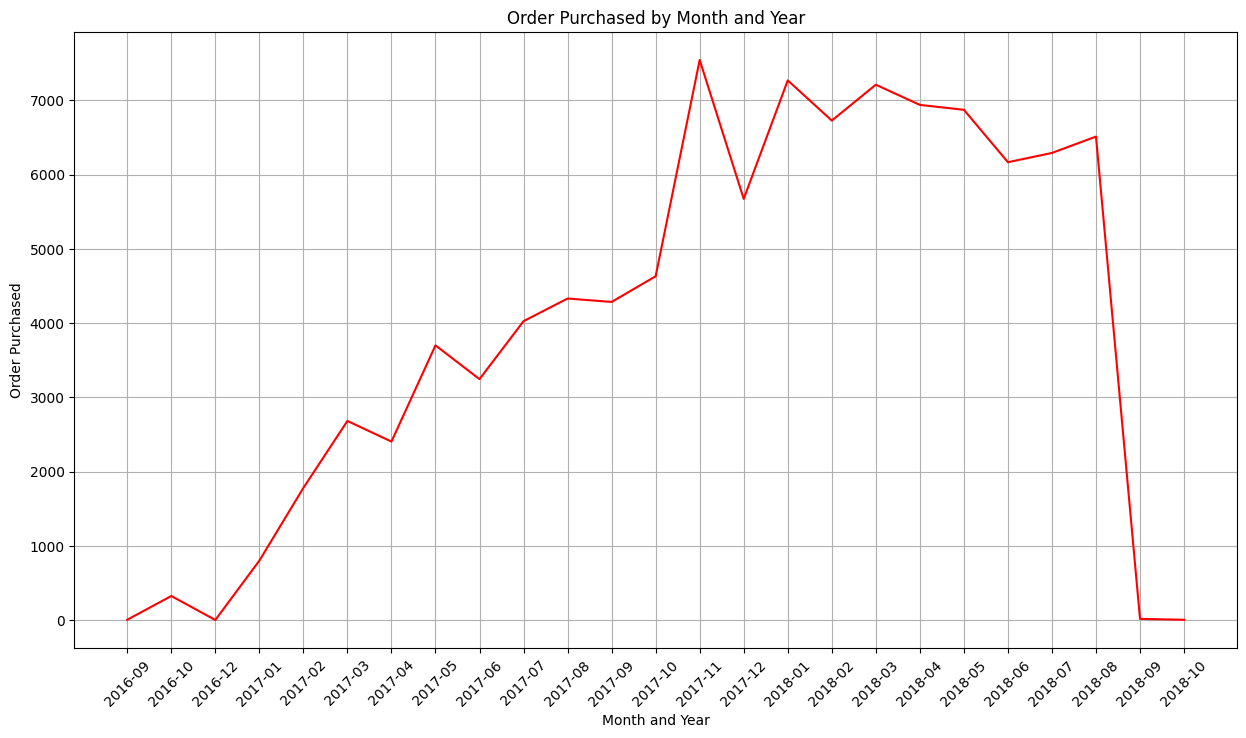

In [39]:
orders['order_purchase_month_and_year'] = orders['order_purchase_timestamp'].dt.strftime('%Y-%m')  #extracting month and year from timestamp
time = orders['order_purchase_month_and_year'].value_counts().sort_index()

plt.figure(figsize=(15,8))
sns.lineplot(x=time.index,y=time.values,color='red')
plt.title('Order Purchased by Month and Year')
plt.ylabel('Order Purchased')
plt.xlabel('Month and Year')
plt.xticks(rotation=45)
plt.savefig(r'uploads/Order_Purchased_by_Month_and_Year')
plt.show()

**There is a rapid decrease in the order purchase in the year 2018.**

### Analysis of Orders in 2018

In [40]:
# Creating a dataframe of orders purchased in the year 2018

orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]

In [41]:
# Orders sold in each month of 2018
orders_2018['month'] = orders['order_purchase_timestamp'].dt.month
orders_2018['month'].value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30172\716498073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2018['month'] = orders['order_purchase_timestamp'].dt.month


1     7269
2     6728
3     7211
4     6939
5     6873
6     6167
7     6292
8     6512
9       16
10       4
Name: month, dtype: int64

August (8th) month also had a decent sales. But there is a rapid drop in the month September (9th) month and October (10th) month. This could be because of unavaibility of data or some other factor.

In [42]:
on_time = np.count_nonzero(orders_2018['order_delivered_customer_date'].dt.strftime('%Y-%m-%d') == orders_2018['order_estimated_delivery_date'])
early = np.count_nonzero(orders_2018['order_delivered_customer_date'].dt.strftime('%Y-%m-%d') < orders_2018['order_estimated_delivery_date'])
late = np.count_nonzero(orders_2018['order_delivered_customer_date'].dt.strftime('%Y-%m-%d') > orders_2018['order_estimated_delivery_date'])

print('{} orders delivered before estimated time.'.format(early))
print('{} orders delivered on time.'.format(on_time))
print('{} orders delivered after estimated time.'.format(late))

47833 orders delivered before estimated time.
866 orders delivered on time.
4079 orders delivered after estimated time.


**Overall 6535 products were delivered late. From 6535, 4079 products are from 2018. Delay in delivery could be one of the reasons for the decrease in sales.**

## Order Items Data Analysis

In [43]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [44]:
order_items.shape

(112650, 7)

In [45]:
order_items.describe().T

count        mean         std   min    25%    50%     75%  \
order_item_id  112650.0    1.197834    0.705124  1.00   1.00   1.00    1.00   
price          112650.0  120.653739  183.633928  0.85  39.90  74.99  134.90   
freight_value  112650.0   19.990320   15.806405  0.00  13.08  16.26   21.15   

                   max  
order_item_id    21.00  
price          6735.00  
freight_value   409.68

In [46]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [47]:
print('Earliest item shipped on:',order_items['shipping_limit_date'].min())
print('Latest item shipped on:',order_items['shipping_limit_date'].max())

Earliest item shipped on: 2016-09-19 00:15:34
Latest item shipped on: 2020-04-09 22:35:08


In [48]:
order_items['year'] = order_items['shipping_limit_date'].dt.year
print('Orders shipped per month')
order_items['year'].value_counts()

Orders shipped per month


2018    62511
2017    49765
2016      370
2020        4
Name: year, dtype: int64

In [49]:
for item in range(1,22):
    print('Average price (in BRL) of {} is: {}'.format(item,round(order_items[order_items['order_item_id'] == item]['price'].mean(),2)))
    print('Average Freight value (in BLR) of {} is: {}'.format(item,round(order_items[order_items['order_item_id'] == item]['freight_value'].mean(),2)))
    print()

Average price (in BRL) of 1 is: 125.96
Average Freight value (in BLR) of 1 is: 20.2

Average price (in BRL) of 2 is: 85.46
Average Freight value (in BLR) of 2 is: 18.54

Average price (in BRL) of 3 is: 78.0
Average Freight value (in BLR) of 3 is: 18.23

Average price (in BRL) of 4 is: 77.24
Average Freight value (in BLR) of 4 is: 18.75

Average price (in BRL) of 5 is: 75.56
Average Freight value (in BLR) of 5 is: 18.54

Average price (in BRL) of 6 is: 76.17
Average Freight value (in BLR) of 6 is: 19.36

Average price (in BRL) of 7 is: 100.71
Average Freight value (in BLR) of 7 is: 19.03

Average price (in BRL) of 8 is: 120.77
Average Freight value (in BLR) of 8 is: 22.25

Average price (in BRL) of 9 is: 80.36
Average Freight value (in BLR) of 9 is: 19.59

Average price (in BRL) of 10 is: 81.57
Average Freight value (in BLR) of 10 is: 15.89

Average price (in BRL) of 11 is: 60.15
Average Freight value (in BLR) of 11 is: 17.4

Average price (in BRL) of 12 is: 51.06
Average Freight value 

In [50]:
order_items['total_price'] = order_items['price'] * order_items['freight_value']

for item in range(1,22):
    print('Average total price of item {} is: {}'.format(item,round(order_items[order_items['order_item_id'] == item]['total_price'].mean(),2)))
    print()

Average total price of item 1 is: 3830.89

Average total price of item 2 is: 2165.13

Average total price of item 3 is: 1867.39

Average total price of item 4 is: 1899.96

Average total price of item 5 is: 1892.79

Average total price of item 6 is: 2043.2

Average total price of item 7 is: 2610.72

Average total price of item 8 is: 3650.95

Average total price of item 9 is: 2011.49

Average total price of item 10 is: 1352.59

Average total price of item 11 is: 1560.57

Average total price of item 12 is: 689.31

Average total price of item 13 is: 602.18

Average total price of item 14 is: 656.55

Average total price of item 15 is: 714.03

Average total price of item 16 is: 815.57

Average total price of item 17 is: 815.57

Average total price of item 18 is: 815.57

Average total price of item 19 is: 815.57

Average total price of item 20 is: 815.57

Average total price of item 21 is: 51.25



In [51]:
print("Total Products ordered are:",len(order_items['product_id'].unique()))

Total Products ordered are: 32951


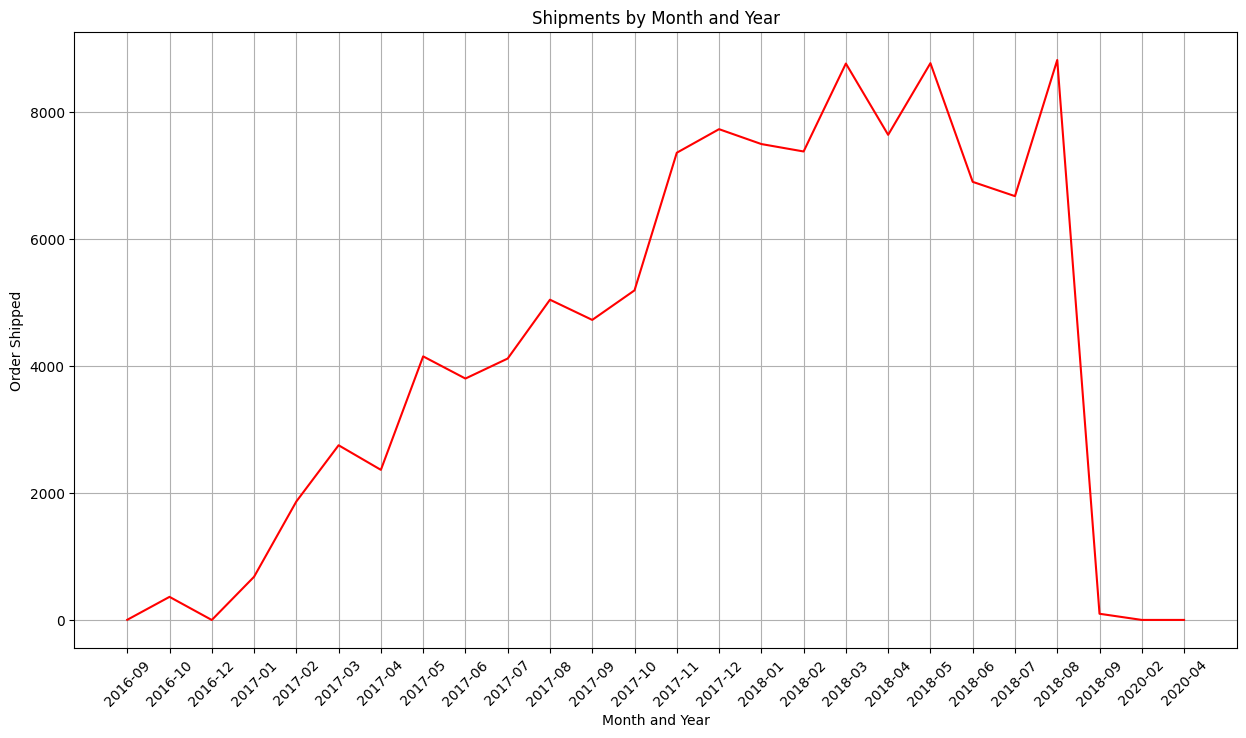

In [52]:
order_items['shipping_month_and_year'] = order_items['shipping_limit_date'].dt.strftime('%Y-%m')
time = order_items['shipping_month_and_year'].value_counts().sort_index()

plt.figure(figsize=(15,8))
sns.lineplot(x=time.index,y=time.values,color='red')
plt.title('Shipments by Month and Year')
plt.ylabel('Order Shipped')
plt.xlabel('Month and Year')
plt.xticks(rotation=45)
plt.savefig(r'uploads/Shipments_by_Month_and_Year')
plt.show()

**Again there is a rapid fall after August 2018. Something must have happened to Target Corporation during these period.**

## Order Review Dataset Analysis

In [53]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  ParabÃ©ns lojas lannister adorei comprar pela ...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:00  
1     2018-03-11 03:05:00  
2     2018-02-18 14:36:00  
3     2017-04-21 22:02:00  
4     2018-03-02 10:26:00

In [54]:
order_reviews.shape

(99224, 7)

In [55]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11567 non-null  object        
 4   review_comment_message   40974 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [56]:
def clean_timestamp(timestamp):
    """Converts various time formats into a single time format"""
    formats = ["%Y-%m-%d %H:%M:%S","%d/%m/%y %H:%M","%d-%m-%Y %H:%M"]   #formats to check
    for fmt in formats:
        try:
            dt = datetime.strptime(str(timestamp),fmt)
            return dt.strftime("%Y-%m-%d %H:%M:%S")
        except ValueError:
            pass
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'].apply(clean_timestamp))
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'].apply(clean_timestamp))

In [57]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87657
review_comment_message     58250
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [58]:
order_reviews['review_comment_title'].fillna('No review',inplace=True)

In [59]:
order_reviews['review_score'].value_counts().sort_index()

1    11424
2     3151
3     8179
4    19142
5    57328
Name: review_score, dtype: int64

Maximum number of products have a rating score of 5. Which is a good thing.

In [60]:
print('Average Review Score:',round(order_reviews['review_score'].mean(),3))

Average Review Score: 4.086


In [61]:
print('Average Review Score:',round(order_reviews['review_score'].median(),3))

Average Review Score: 5.0


In [62]:
print("Total Unique titles are:",len(order_reviews['review_comment_title'].unique()))

Total Unique titles are: 4515


In [63]:
print('Average Time Taken to answer review:',np.mean(order_reviews['review_answer_timestamp'] - order_reviews['review_creation_date']))

Average Time Taken to answer review: 3 days 03:34:03.592477626


In [64]:
for score in range(1,6):
    score_df = order_reviews[order_reviews['review_score'] == score]
    average = np.mean(score_df['review_answer_timestamp'] - score_df['review_creation_date'])
    print('Average time taken to reply review with score {} is: {}'.format(score,average))

Average time taken to reply review with score 1 is: 3 days 01:12:33.429621848
Average time taken to reply review with score 2 is: 3 days 00:05:26.239289114
Average time taken to reply review with score 3 is: 2 days 23:32:23.401393813
Average time taken to reply review with score 4 is: 3 days 02:52:56.041166022
Average time taken to reply review with score 5 is: 3 days 05:01:56.142199274


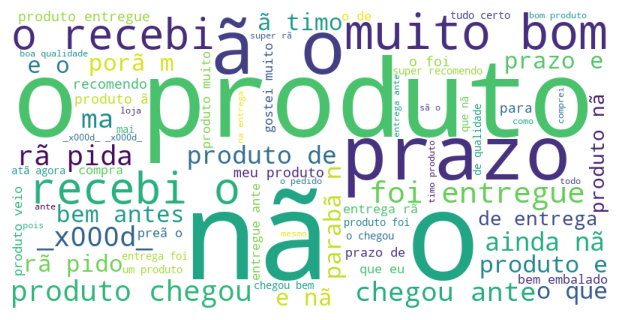

In [65]:
from wordcloud import WordCloud, STOPWORDS
review_message = ''
stopwords = set(STOPWORDS)
for val in order_reviews['review_comment_message'].dropna():
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    review_message += ' '.join(tokens)+" "
wordcloud =  WordCloud(colormap='viridis',width = 800, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_message)

plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig(r'uploads/wordcloud')
plt.show()

## Payments Dataset Analysis

In [66]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [67]:
payments.shape

(103886, 5)

In [68]:
print(f"Unique Orders: {len(payments['order_id'].unique())}")

Unique Orders: 99440


In [69]:
payments.describe().T

count        mean         std  min    25%    50%  \
payment_sequential    103886.0    1.092679    0.706584  1.0   1.00    1.0   
payment_installments  103886.0    2.853349    2.687051  0.0   1.00    1.0   
payment_value         103886.0  154.100380  217.494064  0.0  56.79  100.0   

                           75%       max  
payment_sequential      1.0000     29.00  
payment_installments    4.0000     24.00  
payment_value         171.8375  13664.08

In [70]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [71]:
payments['payment_type'].value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

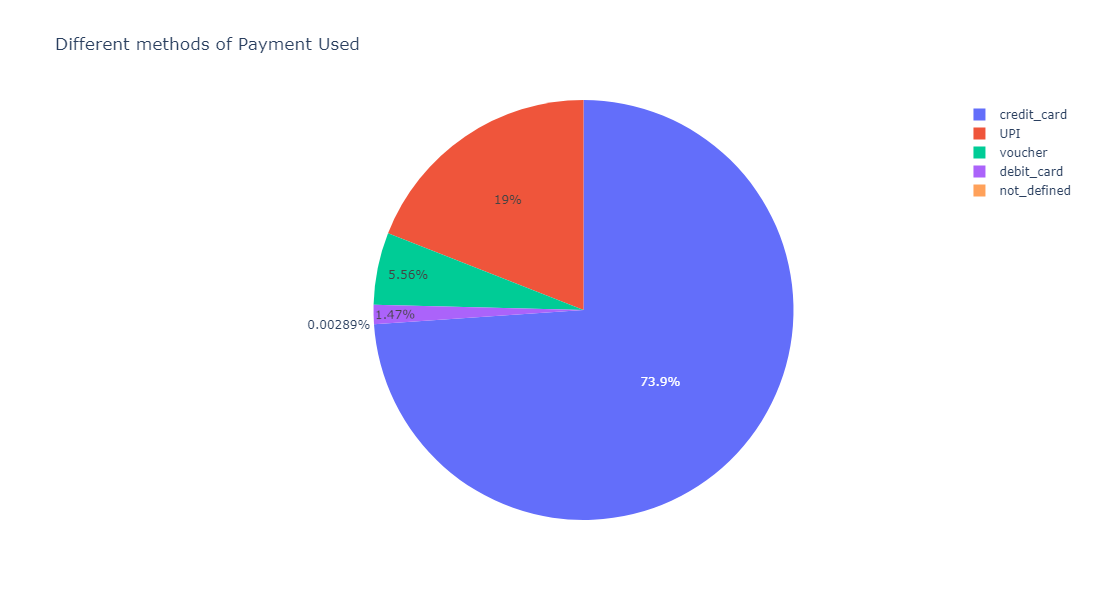

In [72]:
fig = px.pie(names=payments['payment_type'].value_counts().index,values=payments['payment_type'].value_counts().values,
             title='Different methods of Payment Used')
fig.update_layout(width=800, height=600)
fig.show()

In [73]:
for method in payments['payment_type'].unique():
    mean_payment = payments[payments['payment_type'] == method]['payment_value'].mean()
    mean_installment = payments[payments['payment_type'] == method]['payment_installments'].mean()
    print(f'Payment Type: {method}')
    print(f'Average Payment Value:${round(mean_payment,2)}')
    print(f'Average Installments:{round(mean_installment)}')
    print()

Payment Type: credit_card
Average Payment Value:$163.32
Average Installments:4

Payment Type: UPI
Average Payment Value:$145.03
Average Installments:1

Payment Type: voucher
Average Payment Value:$65.7
Average Installments:1

Payment Type: debit_card
Average Payment Value:$142.57
Average Installments:1

Payment Type: not_defined
Average Payment Value:$0.0
Average Installments:1



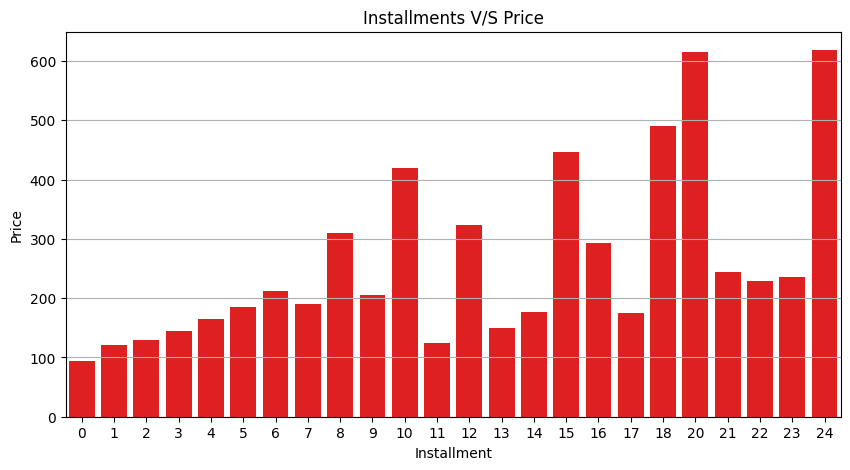

In [74]:
order_ids = list(payments['order_id'].unique()) # List of unique order_id present in the dataframe
installments = []
amount_paid =  []
for order_id in order_ids:
    df = payments[payments['order_id'] == order_id]
    installment = df['payment_installments'].max() # Maximum installments taken to pay for the order
    amount = df['payment_value'].sum()        # total amount paid
    installments.append(installment)
    amount_paid.append(amount)


unique_order_df = pd.DataFrame({'order_id':order_ids,'installments':installments,'amount_paid':amount_paid})

plt.figure(figsize=(10,5))
sns.barplot(data=unique_order_df,x='installments',y='amount_paid',errorbar=None,color='red')
plt.title('Installments V/S Price')
plt.xlabel('Installment')
plt.ylabel('Price')
plt.savefig('uploads/Installments_and_Price')
plt.show()

## Products Dataset Analysis

In [75]:
products.head()

product_id product category  product_name_length  \
0  1e9e8ef04dbcff4541ed26657ea517e5        perfumery                 40.0   
1  3aa071139cb16b67ca9e5dea641aaa2f              Art                 44.0   
2  96bd76ec8810374ed1b65e291975717f    sport leisure                 46.0   
3  cef67bcfe19066a932b7673e239eb23d           babies                 27.0   
4  9dc1a7de274444849c219cff195d0b71       housewares                 37.0   

   product_description_length  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       276.0                 1.0            1000.0   
2                       250.0                 1.0             154.0   
3                       261.0                 1.0             371.0   
4                       402.0                 4.0             625.0   

   product_length_cm  product_height_cm  product_width_cm  
0               16.0               10.0              14.0  
1               30.0               18.0              20.0  
2               18.0                9.0              15.0  
3               26.0                4.0              26.0  
4               20.0               17.0              13.0

In [76]:
products.shape

(32951, 9)

In [77]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product category            32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [78]:
products.isnull().sum()

product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [79]:
products[products.isnull().any(axis=1)]

product_id product category  product_name_length  \
105    a41e356c76fab66334f36de622ecbd3a              NaN                  NaN   
128    d8dee61c2034d6d075997acef1870e9b              NaN                  NaN   
145    56139431d72cd51f19eb9f7dae4d1617              NaN                  NaN   
154    46b48281eb6d663ced748f324108c733              NaN                  NaN   
197    5fb61f482620cb672f5e586bb132eae9              NaN                  NaN   
...                                 ...              ...                  ...   
32515  b0a0c5dd78e644373b199380612c350a              NaN                  NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56              NaN                  NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8              NaN                  NaN   
32772  fa51e914046aab32764c41356b9d4ea4              NaN                  NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b              NaN                  NaN   

       product_description_length  product_photos_qty  product_weight_g  \
105                           NaN                 NaN             650.0   
128                           NaN                 NaN             300.0   
145                           NaN                 NaN             200.0   
154                           NaN                 NaN           18500.0   
197                           NaN                 NaN             300.0   
...                           ...                 ...               ...   
32515                         NaN                 NaN            1800.0   
32589                         NaN                 NaN             800.0   
32616                         NaN                 NaN             200.0   
32772                         NaN                 NaN            1300.0   
32852                         NaN                 NaN             700.0   

       product_length_cm  product_height_cm  product_width_cm  
105                 17.0               14.0              12.0  
128                 16.0                7.0              20.0  
145                 20.0               20.0              20.0  
154                 41.0               30.0              41.0  
197                 35.0                7.0              12.0  
...                  ...                ...               ...  
32515               30.0               20.0              70.0  
32589               30.0               10.0              23.0  
32616               21.0                8.0              16.0  
32772               45.0               16.0              45.0  
32852               28.0                3.0              43.0  

[611 rows x 9 columns]

In [80]:
products.dropna(how='all',subset=['product category','product_name_length','product_description_length','product_photos_qty'],inplace=True)

After this, only one row remains with missing values. The *product category* of that row is *babies*. To fill these null values, will use the average values of *babies* category.

In [81]:
products['product_weight_g'].fillna(products[products['product category'] == 'babies']['product_weight_g'].mean(),inplace=True)
products['product_length_cm'].fillna(products[products['product category'] == 'babies']['product_length_cm'].mean(),inplace=True)
products['product_height_cm'].fillna(products[products['product category'] == 'babies']['product_height_cm'].mean(),inplace=True)
products['product_width_cm'].fillna(products[products['product category'] == 'babies']['product_width_cm'].mean(),inplace=True)

In [82]:
products.describe()

product_name_length  product_description_length  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32341.000000       32341.000000       32341.000000   
mean        2276.999202          30.854740          16.958957   
std         4279.232546          16.955739          13.635929   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32341.000000  
mean          23.208767  
std           12.078614  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [83]:
categories = products['product category'].unique()
print('Total Categories:',len(categories))
print('\nCategories:')
print(categories)

Total Categories: 73

Categories:
['perfumery' 'Art' 'sport leisure' 'babies' 'housewares'
 'musical instruments' 'Cool Stuff' 'Furniture Decoration'
 'home appliances' 'toys' 'bed table bath' 'CONSTRUCTION SECURITY TOOLS'
 'computer accessories' 'HEALTH BEAUTY' 'Bags Accessories' 'Garden tools'
 'Furniture office' 'automotive' 'electronics' 'Fashion Calcados'
 'telephony' 'stationary store' 'Fashion Bags and Accessories' 'PCs'
 'Casa Construcao' 'Watches present' 'Construction Tools Construction'
 'pet Shop' 'electrostile' 'Agro Industria e Comercio' 'Room Furniture'
 'SIGNALIZATION AND SAFETY' 'climatization' 'Games consoles'
 'General Interest Books' 'Construction Tools Tools'
 'Fashion Underwear and Beach Fashion' "Fashion Men's Clothing"
 'Furniture Kitchen Service Area Dinner and Garden'
 'Industry Commerce and Business' 'fixed telephony'
 'Construction Tools Illumination' 'technical books' 'ELECTRICES 2'
 'party articles' 'drinks' 'Market Place' 'La Cuisine'
 'Construction Tools

#### Data Cleaning

In [84]:
import re

def clean_categories(category):
    # Convert to lowercase
    category = category.lower()
    
    # Trim whitespace
    category = category.strip()
    
    # Replace special characters and correct common typos
    category = re.sub(r'[^a-zA-Z0-9\s]', '', category)  # Remove special characters
    category = category.replace('&', 'and')
    category = re.sub(r'\btelephony\b', 'telecommunications', category)
    category = re.sub(r'\bcalcados\b', 'shoes', category)
    category = re.sub(r'\bcine\b', 'cinema', category)
    category = re.sub(r'\bfotos\b', 'photo', category)
    category = re.sub(r'\blivros\b', 'books', category)
    category = re.sub(r'\bfoto\b', 'photo', category)
    category = re.sub(r'\bmovel\b', 'furniture', category)
    category = re.sub(r'\bdvds\b', 'dvd', category)
    category = re.sub(r'\bpcs\b', 'computers', category)
    category = re.sub(r'\bfax\b', 'facsimile', category)
    category = re.sub(r'\bcds\b', 'cd', category)
    category = re.sub(r'\bcameras\b', 'camera', category)
    category = re.sub(r'\bagricultura\b', 'agriculture', category)
    
    return category


category_mapping = {'perfumery': 'beauty and health','health beauty': 'beauty and health','art': 'arts and crafts','arts and crafts': 'arts and crafts',
                    'musical instruments': 'entertainment','cool stuff': 'miscellaneous','furniture decoration': 'furniture','home appliances': 'home and garden',
                    'furniture office': 'furniture','garden tools': 'home and garden','room furniture': 'furniture','housewares': 'home and garden',
                    'bed table bath': 'home and garden','construction security tools': 'hardware','construction tools construction': 'hardware',
                    'construction tools tools': 'hardware','construction tools illumination': 'hardware','construction tools garden': 'hardware',
                    'computer accessories': 'computers','electronics': 'electronics','fashion calcados': 'fashion','fashion bags and accessories': 'fashion',
                    'fashion underwear and beach fashion': 'fashion',"fashion men's clothing": 'fashion',"fashion women's clothing": 'fashion',
                    "fashion children's clothing": 'fashion','fashion sport': 'fashion','watches present': 'fashion','stationary store': 'office supplies',
                    'office supplies': 'office supplies','pcs': 'computers','telecommunications': 'electronics','pc gamer': 'computers','cine photo': 'entertainment',
                    'general interest books': 'books','technical books': 'books','imported books': 'books','drinks': 'food','drink foods': 'food','foods': 'food',
                    'image import tablets': 'electronics','hygiene diapers': 'baby products','babies': 'baby products','pet shop': 'pet products',
                    'flowers': 'home and garden','house comfort': 'home and garden','house comfort 2': 'home and garden','toys': 'toys','games consoles': 'entertainment',
                    'audio': 'entertainment','blu ray dvds': 'entertainment','cds music dvds': 'entertainment','song': 'entertainment','party articles': 'entertainment',
                    'market place': 'miscellaneous','la cuisine': 'home and garden','house pastals oven and cafe': 'home and garden',
                    'agro industria e comercio': 'industry and commerce','industry commerce and business': 'industry and commerce','fixed telephony': 'electronics',
                    'electrostile': 'electronics','signalization and safety': 'hardware','insurance and services': 'services'}

In [85]:
products['product category'] = products['product category'].apply(clean_categories)
products['product category'] = products['product category'].map(category_mapping)
products['product category'].fillna('miscellaneous', inplace=True)

In [86]:
categories = products['product category'].unique()
print('Revised Total Categories:',len(categories))
print('\nCategories:')
print(categories)

Revised Total Categories: 18

Categories:
['beauty and health' 'arts and crafts' 'miscellaneous' 'baby products'
 'home and garden' 'entertainment' 'furniture' 'toys' 'hardware'
 'computers' 'electronics' 'office supplies' 'fashion' 'pet products'
 'industry and commerce' 'books' 'food' 'services']


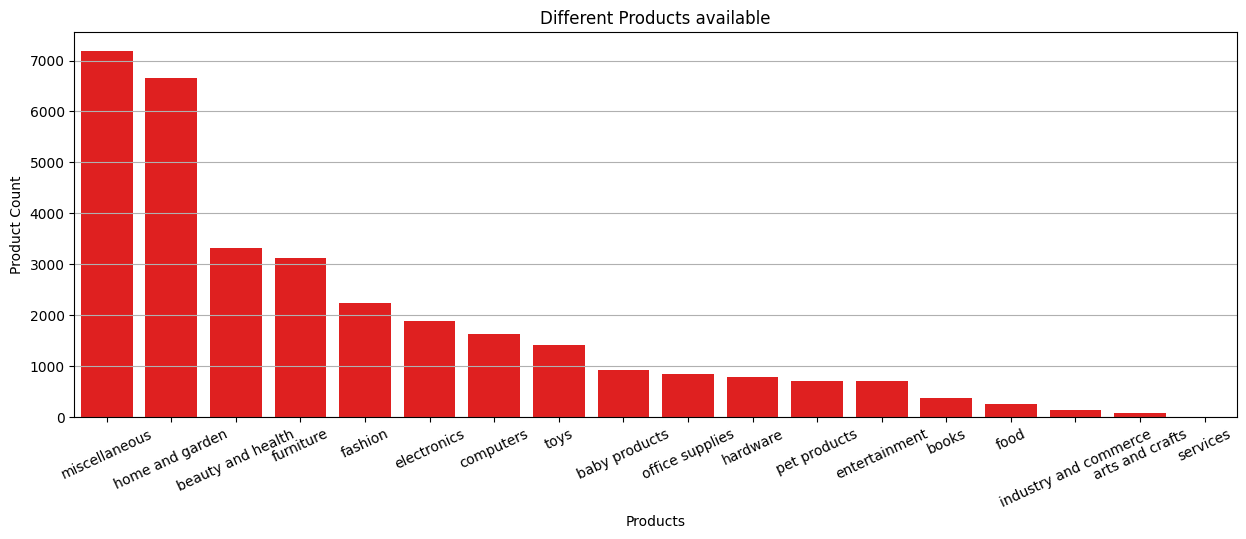

In [87]:
plt.figure(figsize=(15,5))
sns.barplot(x=products['product category'].value_counts().index,y=products['product category'].value_counts().values,errorbar=None,color='red')
plt.xticks(rotation=25)
plt.title('Different Products available')
plt.xlabel('Products')
plt.ylabel('Product Count')
plt.savefig(r'uploads/different_products_available')
plt.show()

## Orders and Order Item

In [88]:
df = pd.merge(left=orders[['order_id','order_purchase_timestamp']],right=order_items[['order_id','price','freight_value']])
df.head()

order_id order_purchase_timestamp   price  \
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   29.99   
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37  118.70   
2  47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49  159.90   
3  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   45.00   
4  ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   19.90   

   freight_value  
0           8.72  
1          22.76  
2          19.22  
3          27.20  
4           8.72

In [89]:
print('Total Revenue Generated(in BRL ):',round(np.sum(df['price']),2))

Total Revenue Generated(in BRL ): 13591643.7


In [90]:
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month

revenue = df.groupby(by='year').agg({'price':'sum','order_id':'count'}).rename(columns={'price':'revenue(in BRL)','order_id':'number of orders'})
revenue

revenue(in BRL)  number of orders
year                                   
2016         49785.92               370
2017       6155806.98             50864
2018       7386050.80             61416

In [91]:
print("Increase in Revenue from 2016 to 2017:",round(((revenue.iloc[1,0] - revenue.iloc[0,0])/revenue.iloc[0,0]) * 100,2),"%")
print("Increase in Revenue from 2017 to 2018:",round(((revenue.iloc[2,0] - revenue.iloc[1,0])/revenue.iloc[1,0]) * 100,2),"%")

Increase in Revenue from 2016 to 2017: 12264.55 %
Increase in Revenue from 2017 to 2018: 19.99 %


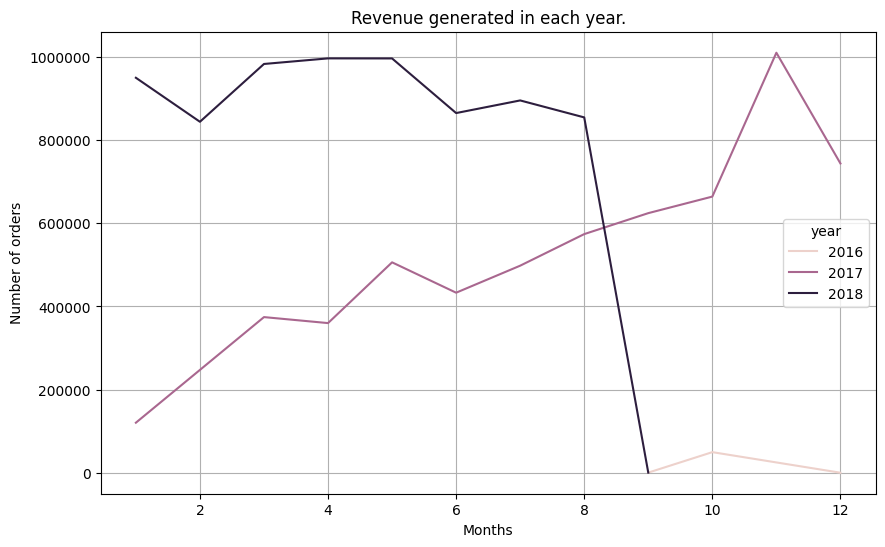

In [92]:
sale_per_month = df.groupby(by=['year','month']).agg({'price':'sum','order_id':'count'}).rename(
                columns={'price':'revenue(in BRL)','order_id':'number of orders'})

plt.figure(figsize = (10,6))
sns.lineplot(data  = sale_per_month, x = "month", y = "revenue(in BRL)", hue = "year")
plt.title("Revenue generated in each year.")
plt.xlabel('Months')
plt.ylabel('Number of orders')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig(r'uploads/revenue_generated_in_each_year')
plt.show()

In [93]:
sale_per_month.head()

revenue(in BRL)  number of orders
year month                                   
2016 9               267.36                 6
     10            49507.66               363
     12               10.90                 1
2017 1            120312.87               955
     2            247303.02              1951

In [94]:
rolling_average = sale_per_month['revenue(in BRL)'].to_frame().rolling(window=4).mean().rename(columns={'revenue(in BRL)':'rolling_average'})
#rolling_average['date'] = pd.to_datetime(rolling_average[['year', 'month']].assign(day=1))
rolling_average.head()

rolling_average
year month                 
2016 9                  NaN
     10                 NaN
     12                 NaN
2017 1           42524.6975
     2          104283.6125

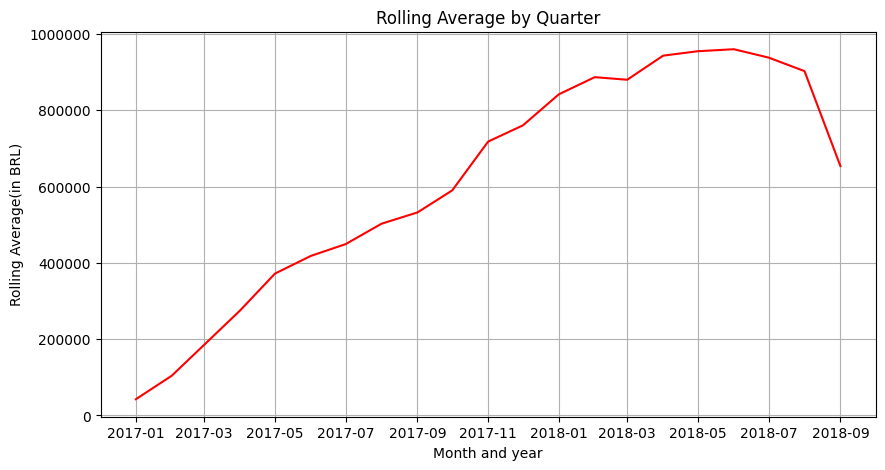

In [95]:
rolling_average = sale_per_month['revenue(in BRL)'].to_frame().rolling(window=4).mean().rename(columns={'revenue(in BRL)':'rolling_average'}).reset_index()
rolling_average['date'] = pd.to_datetime(rolling_average[['year', 'month']].assign(day=1))

plt.figure(figsize=(10,5))
sns.lineplot(data=rolling_average,x='date',y='rolling_average',color='red')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Rolling Average by Quarter")
plt.xlabel("Month and year")
plt.ylabel("Rolling Average(in BRL)")
plt.savefig(r'uploads/rolling_average_by_quarter')
plt.show()

## Customers and Orders

In [96]:
df = pd.merge(left=orders,right=customers)
df.drop(columns=['order_id','customer_zip_code_prefix'],inplace=True)
df.head()

customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3  f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4  8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   

    order_approved_at order_delivered_carrier_date  \
0 2017-10-02 11:07:15          2017-10-04 19:55:00   
1 2018-07-26 03:24:27          2018-07-26 14:31:00   
2 2018-08-08 08:55:23          2018-08-08 13:50:00   
3 2017-11-18 19:45:59          2017-11-22 13:39:59   
4 2018-02-13 22:20:29          2018-02-14 19:46:34   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-10 21:25:13                    2017-10-18   
1           2018-08-07 15:27:45                    2018-08-13   
2           2018-08-17 18:06:29                    2018-09-04   
3           2017-12-02 00:28:42                    2017-12-15   
4           2018-02-16 18:17:02                    2018-02-26   

  order_purchase_month_and_year                customer_unique_id  \
0                       2017-10  7c396fd4830fd04220f754e42b4e5bff   
1                       2018-07  af07308b275d755c9edb36a90c618231   
2                       2018-08  3a653a41f6f9fc3d2a113cf8398680e8   
3                       2017-11  7c142cf63193a1473d2e66489a9ae977   
4                       2018-02  72632f0f9dd73dfee390c9b22eb56dd6   

             customer_city                state       region  
0                sao paulo            São Paulo    Southeast  
1                barreiras                Bahia    Northeast  
2               vianopolis                Goiás  Center West  
3  sao goncalo do amarante  Rio Grande do Norte    Northeast  
4              santo andre            São Paulo    Southeast

In [97]:
df["delivery_status"] = np.where(orders['order_delivered_customer_date'].dt.strftime('%Y-%m-%d') > orders['order_estimated_delivery_date'],"Delayed",
                                np.where(orders['order_delivered_customer_date'].dt.strftime('%Y-%m-%d') < orders['order_estimated_delivery_date'],"Early","On-time"))

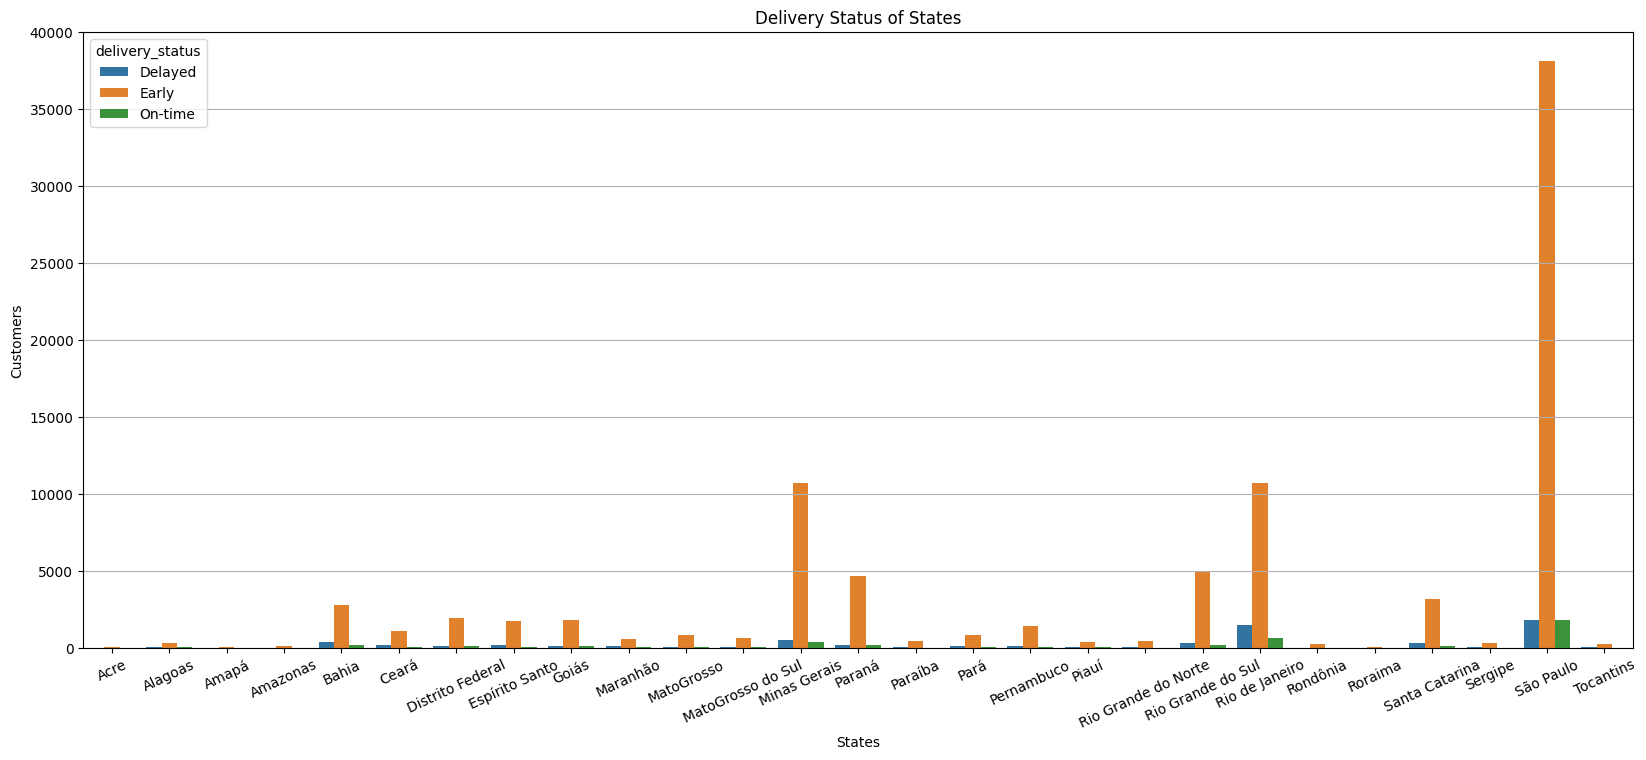

In [98]:
deliver_status_df = df.groupby(['state','delivery_status'])['customer_id'].count().reset_index().rename(columns={"customer_id":"customers"})

plt.figure(figsize=(20,8))
sns.barplot(data=deliver_status_df,x='state',y='customers',hue='delivery_status')
plt.title("Delivery Status of States")
plt.xlabel("States")
plt.xticks(rotation=25)
plt.ylabel("Customers")
plt.savefig(r'uploads/delivery_status_of_status')
plt.show()

In [99]:
average_delivery_time_SP = np.mean(df[df['state'] == "São Paulo"]["order_delivered_customer_date"] - df[df['state'] == "São Paulo"]["order_approved_at"])
other_average_delivery_time = np.mean(df[df['state'] != "São Paulo"]["order_delivered_customer_date"] - df[df['state'] != "São Paulo"]["order_approved_at"])
print(f"On average it take {average_delivery_time_SP} for delivery with the customer is from São Paulo.")
print(f"On average it take {other_average_delivery_time} for delivery with the customer is not from São Paulo.")
print(f"The difference is of {other_average_delivery_time - average_delivery_time_SP}.")

On average it take 8 days 08:31:12.157224006 for delivery with the customer is from São Paulo.
On average it take 14 days 20:40:28.363110126 for delivery with the customer is not from São Paulo.
The difference is of 6 days 12:09:16.205886120.


## Order Items and Order reviews

In [100]:
df = pd.merge(left=order_items[['order_id','price']],right=order_reviews[['order_id','review_score']],on='order_id')

#### Test for Normality

***Null Hypothesis(H_0)***:

                    Sample comes from a normal distribution

***Alternate Hypothesis(H_1)***:

                    Sample does not come from a normal distribution

In [101]:
st, p_value = stats.normaltest(df['price'])
print(f"The statistic of price is {st} with p-value {p_value}")
st, p_value = stats.normaltest(df['review_score'])
print(f"The statistic of review_score is {st} with p-value {p_value}")

The statistic of price is 152195.32617889874 with p-value 0.0
The statistic of review_score is 18963.260174519542 with p-value 0.0


Since the p-value of both the field is less than 0.05, we refute null hypothesis and conclude both the distribution is not normally distributed with 0.05 level of significance.

#### Correlation

***Null Hypothesis(H_0)***:

                    There is no correlation between price and review_score

***Alternate Hypothesis(H_1)***:

                    There is a positive correlation between price and review_score

In [102]:
correlation, p_value = stats.spearmanr(df['price'],df['review_score'],alternative='greater')
print(f"Pearson correlation coefficient:{round(correlation,4)}")
print(f"P-Value:{p_value}")

Pearson correlation coefficient:0.0053
P-Value:0.03793173741324774


Since the p-value is less than 0.05, we refute null hypothesis and conclude with 5% of level of significance there is a positive correlation between price and review score.

In [103]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'state',
       'region'],
      dtype='object')

## Customers and Order items

In [104]:
df = pd.merge(left=order_items[['seller_id','price','freight_value']],right=sellers[['seller_id','state']],on='seller_id')

In [105]:
((df.groupby('state')['price'].sum()/df['price'].sum()) * 100).sort_values()

state
Acre                    0.001964
Amazonas                0.008660
Pará                    0.009109
Sergipe                 0.011818
Piauí                   0.018556
Rondônia                0.035038
MatoGrosso do Sul       0.062919
Rio Grande do Norte     0.073520
MatoGrosso              0.125597
Paraíba                 0.125776
Ceará                   0.148920
Maranhão                0.267877
Espírito Santo          0.350874
Goiás                   0.488530
Pernambuco              0.673163
Distrito Federal        0.719188
Bahia                   2.101008
Rio Grande do Sul       2.785237
Santa Catarina          4.653051
Rio de Janeiro          6.209582
Minas Gerais            7.442549
Paraná                  9.284287
São Paulo              64.402779
Name: price, dtype: float64

São Paulo generates 64.4% of revenue

In [106]:
df.groupby('state')['freight_value'].mean().sort_values()

state
São Paulo              18.452213
Pará                   19.388750
Rio de Janeiro         19.474865
Distrito Federal       20.571813
Paraná                 22.720969
Rio Grande do Norte    23.287679
MatoGrosso do Sul      23.979200
Minas Gerais           24.084634
Goiás                  24.164423
Rio Grande do Sul      26.031419
Santa Catarina         26.146518
Amazonas               27.266667
Pernambuco             27.661741
Maranhão               29.978494
Bahia                  30.638694
Sergipe                31.849000
MatoGrosso             31.942966
Espírito Santo         32.718091
Acre                   32.840000
Piauí                  36.943333
Paraíba                39.188158
Ceará                  46.381170
Rondônia               50.912857
Name: freight_value, dtype: float64

Rondônia has the highest freight value. While the São Paulo had the lowest.